# Titanic Data Analysis
In this project, I will investigate the data of a csv containing demographics and information of 891 of the 2224 passengers and crew who travelled in the Titanic. Specifically, I will be answering the following questions:
## What factors, among the ones available in the dataset, influenced people's likelihood to survive the wreck of the Titanic? Did they make people more or less likely to survive?

In order to answer those questions, several other intermediate questions may arise during the analysis.

The first step is to import all of the libraries I will be using, as well as loading the csv data and having a first look at it.



In [110]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

filename = 'titanic-data.csv'

titanic_df = pd.read_csv(filename)

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We can see the data was loaded successfully and use the information on the Kaggle website to understand the values of each column. From the start, it is clear that any analysis done using this dataset can only be valid under the assumption that the 891 people were identified randomly. In other words, there can't be any factor that made some people more likely than others to be in this dataset.

**This analysis will focus on factors related to the logistics of the ship, namely Pclass, Cabin and Embarked**, instead of more demographic factors such as **Sex**, **Age**, **SibSp** and **Parch**. The info of the columns **Ticket** and **Fare** can be expected to be included in the three factors chosen, since tickets and fares are usually determined by classes, cabins and may reflect the port of embarkation as well. 

# Part I: Exploratory visualizations

Next, I will have a look into each of the chosen columns and see how I can analyze it as a possible factor in how likely people were to survive. When analyzing each column info, the main thing I will be looking at is how the survival rate differs for the different values of the column. I will create a function that does just that:



In [111]:
def survival_mean(column_name):
    return titanic_df.groupby(column_name).mean()['Survived']

It is also important to see how many different values a column has, to see if it makes sense to take the existing values as categories for comparison, or if we should instead create buckets grouping some of the values. To do that easily, I will create a function by modifying *survival_mean*, which will instead show the frequency of each value of the column: 

In [112]:
def column_freq(column_name):
    return titanic_df.groupby(column_name).count()['Survived'] / titanic_df['Survived'].count()

With that, we can start looking at each column. Let's start with **Pclass**:

In [113]:
column_freq('Pclass')

Pclass
1    0.242424
2    0.206510
3    0.551066
Name: Survived, dtype: float64

Each value in **Pclass** represents one of the classes available to the passengers: first, second and third. That means just a few categories with a similar number of passengers in each, and no missing values. Thus, we can proceed to look at the survival rate for each class. I will now create a function that creates a bar chart showing the survival rate for each of the values of a column:

In [129]:
def survival_rate_chart(column_name,column_title):
    # Setting x coordinates of bars, y coordinates of bar height, tick labels and alignment
    plt.bar(range(survival_mean(column_name).size),
            survival_mean(column_name),
            tick_label=survival_mean(column_name).index.values,
            align='center')
    # Adding title and axes labels
    plt.title('Survival Rate By ' + column_title)
    plt.xlabel(column_title)
    plt.ylabel('Survival Rate')
    # Adding value labels to each bar
    # The passenger count for each group is included in parentheses
    count = titanic_df.groupby(column_name).count()['Survived'].tolist()
    for a,b in enumerate(survival_mean(column_name)):
        plt.text(a, b+0.01, str(round(b,2))+' ('+str(count[a])+')', fontsize=9.2, ha='center')

We now use the function to create the chart for **Pclass**. The passenger count for each group is included in parentheses:

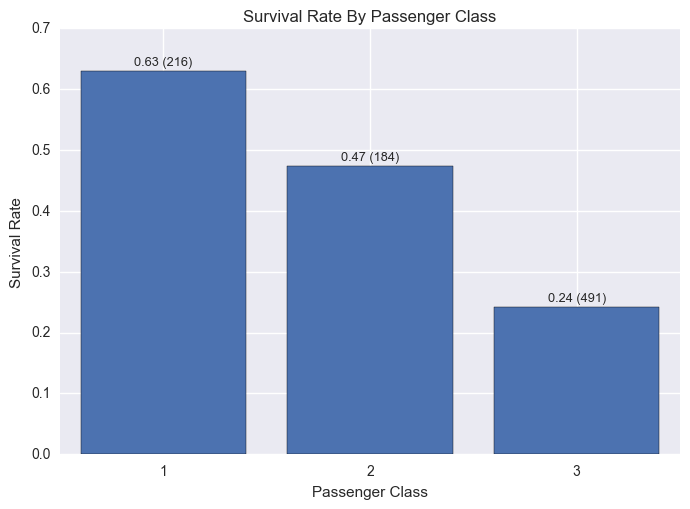

In [115]:
# Creating chart
survival_rate_chart('Pclass','Passenger Class')

# Showing chart
plt.show()

From the chart, it seems that passengers who were in the 3rd Class were significantly less likely to survive. It can be speculated that passengers from 3rd class had worse conditions such as life-saving equipment and/or were treated with lower priority by the crew when boarding boats. Perhaps the locations of the 3rd class cabins were also worse for survival, either on purpose (improved safety being a perk of higher classes) or by coincidence with other circumstances, such as easy access to outdoor views from the ship: it could be a privilege of 1st and 2nd class because of the luxury of the scenery rather than the coincidental easier access to boats.


Now let's move on to the **Embarked** column:


In [116]:
column_freq('Embarked')

Embarked
C    0.188552
Q    0.086420
S    0.722783
Name: Survived, dtype: float64

This column shows the port where the passenger embarked, with "C" being Cherbourg, "Q" meaning Queenstown and "S" being Southampton. It also shows no missing values and just three categories with a similar amount of passengers in each. This means we can look at the survival rate for each category without any further data wrangling. Let's use the *survival_chart* function for that:

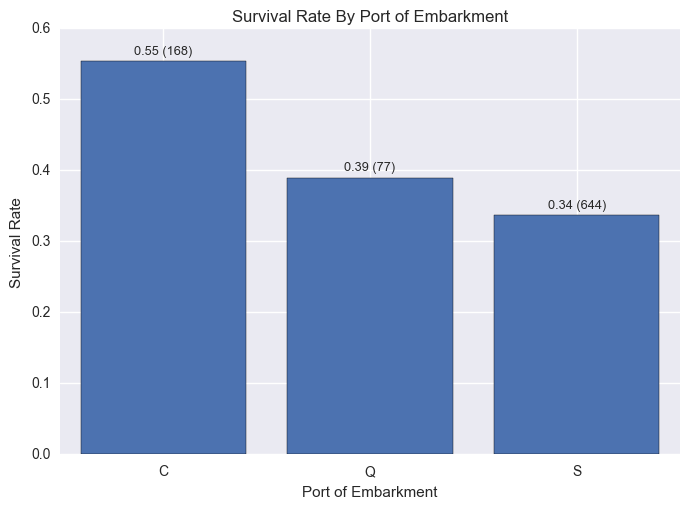

In [117]:
# Creating chart
survival_rate_chart('Embarked','Port of Embarkment')

# Showing chart
plt.show()

It looks like passengers who embarked in Cherbourg had a significantly higher chance of survival. Further investigation using outside sources would be beneficial to speculate about the reason why passengers who embarked at Cherbourg had a higher survival rate than the others. However, it is reasonable to imagine that the difference could exist because most 1st class passengers embarked at that port. Let's have a quick look at the number of passengers grouped by port of embarkment and class:



In [130]:
titanic_df.groupby(['Embarked','Pclass']).count()['PassengerId'] 

Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         127
          2         164
          3         353
Name: PassengerId, dtype: int64

Indeed, Cherbourg had the highest percentage of 1st class passengers by far, and thus that can explain the higher survival rate via the reasons speculated when talking about passenger class. The port was perhaps in a richer area.

Lastly, we have the **Cabin** column. We can imagine that there is a large number of cabins, and from our first look at the data we could already see that there were some missing values. Let's verify this:

In [118]:
column_freq('Cabin')

Cabin
A10      0.001122
A14      0.001122
A16      0.001122
A19      0.001122
A20      0.001122
A23      0.001122
A24      0.001122
A26      0.001122
A31      0.001122
A32      0.001122
A34      0.001122
A36      0.001122
A5       0.001122
A6       0.001122
A7       0.001122
B101     0.001122
B102     0.001122
B18      0.002245
B19      0.001122
B20      0.002245
B22      0.002245
B28      0.002245
B3       0.001122
B30      0.001122
B35      0.002245
B37      0.001122
B38      0.001122
B39      0.001122
B4       0.001122
B41      0.001122
           ...   
E12      0.001122
E121     0.002245
E17      0.001122
E24      0.002245
E25      0.002245
E31      0.001122
E33      0.002245
E34      0.001122
E36      0.001122
E38      0.001122
E40      0.001122
E44      0.002245
E46      0.001122
E49      0.001122
E50      0.001122
E58      0.001122
E63      0.001122
E67      0.002245
E68      0.001122
E77      0.001122
E8       0.002245
F E69    0.001122
F G63    0.001122
F G73    0.002245
F2  

Indeed, an analysis relating cabins to likelihood to survive would be better performed if we group the cabins into a handful of categories. It looks like the first letter of the cabin identification may refer to an area of the boat. We can find out more by doing some research online.

The Encyclopedia Titanica offers some valuable information we can take into account. We can see the location of the cabins in their deckplans (https://www.encyclopedia-titanica.org/titanic-deckplans/). Considering as well their section about the cabins (https://www.encyclopedia-titanica.org/cabins.html), we can see that the first letter indicates the deck where the cabin is located. 

We can then group cabins by decks, and analyze the survival rate for passengers staying in each of the decks. Let's start by creating a **Deck** column in our dataframe: 

In [119]:
# Creating 'Deck' column by taking the first letter of the values in the 'Cabin' column
# Missing values will appear as a 'n', the only lower case value, thus still clearly distinguished
titanic_df['Deck'] = titanic_df['Cabin'].apply(lambda x: str(x)[0])

print (titanic_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Deck  
0      0         A/5 21171   7.2500   NaN        S    n  
1      0          PC 17599  71.2833   C85        C    C  
2      0  STON/O2. 3101282   7.9250   NaN        S    n  
3      0            113803  53.1000  C123        S    C  
4      0            373450   8

The **Deck** column was successfully created. We can now see the frequency of each deck: 

In [120]:
column_freq('Deck')

Deck
A    0.016835
B    0.052750
C    0.066218
D    0.037037
E    0.035915
F    0.014590
G    0.004489
T    0.001122
n    0.771044
Name: Survived, dtype: float64

We can see that most of the passengers (77%) didn't have their cabin identified. It appears that only a couple of people were in decks G and T (and had their cabin identified), which means their survival rate won't be very meaningful in terms of the likelihood of a passenger to survive when they stayed in that deck. Also, the Encyclopedia Titanica states that many of the given cabins are speculative and uncertain, which makes any analysis based on them less certain. Taking that into account, let's have a look at the survival rate per deck:   

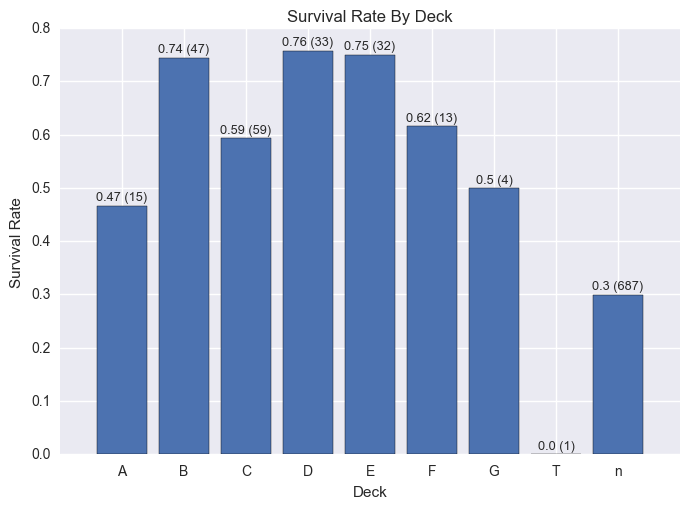

In [121]:
survival_rate_chart('Deck','Deck')
plt.show()

It makes sense that the survival rate of passengers that didn't have their cabin identified is substantially lower than that of those who did: people who survived were able to report the cabins they stayed in. 

Passengers in decks B, D and E had a similar survival rate, and it looks like it may be significantly higher when compared to the rate of passengers from other decks (among the ones that were identified).

We can imagine that the deck the passengers stayed in was determined by their class. Or maybe each deck had cabins of different classes on it. Perhaps there was an interaction between the passenger's class and the deck they stayed at, which could mean, for instance, that 1st class passengers were only more likely to survive if they were in certain decks. 

Let's have a look at this interaction. It may be interesting to look at survival rates for each of them. 

For that, let's use *survival_mean* giving the two columns as parameters:


In [122]:
survby_deck_class = survival_mean(['Deck','Pclass'])
print(survby_deck_class)

Deck  Pclass
A     1         0.466667
B     1         0.744681
C     1         0.593220
D     1         0.758621
      2         0.750000
E     1         0.720000
      2         0.750000
      3         1.000000
F     2         0.875000
      3         0.200000
G     3         0.500000
T     1         0.000000
n     1         0.475000
      2         0.440476
      3         0.235908
Name: Survived, dtype: float64


Let's create a visualization that highlights the most interesting values at a glance. It will be a scatterplot modified to have categorical variables in its axes. On the y axis we will have **Pclass**, and on the x axis, **Deck**.

In [123]:
# Creating values for x and y axes
x_axis = []
y_axis = []

for t in survby_deck_class.index.values:
    x_axis.append(t[0])
    y_axis.append(t[1])
    
print (x_axis)
print (y_axis)

['A', 'B', 'C', 'D', 'D', 'E', 'E', 'E', 'F', 'F', 'G', 'T', 'n', 'n', 'n']
[1, 1, 1, 1, 2, 1, 2, 3, 2, 3, 3, 1, 1, 2, 3]


Since **Deck** isn't numerical, we will have to create a new list that assigns a number to each of the decks. The labels of the ticks on the x axis will be the letters representing each deck.

In [124]:
# Creating labels for the ticks on the x axis    
x_labels = survival_mean('Deck').index.values.tolist()


# Creating list of numerical equivalents to the letters of 'Deck'
# Those numbers will be the location of the ticks on the x axis
num_x_axis = []
for x in x_axis:
    num_x_axis.append(x_labels.index(x)+1)
print(num_x_axis)

[1, 2, 3, 4, 4, 5, 5, 5, 6, 6, 7, 8, 9, 9, 9]


Now we can build the plot:

In [125]:
# Building plot
plt.scatter(num_x_axis,y_axis, c=survby_deck_class, cmap='Blues', s=survby_deck_class*2500)
plt.xticks(range(1,10),x_labels)
plt.yticks(range(1,4),range(1,4))
plt.title('Survival Rate by Deck and Class')
plt.xlabel('Deck')
plt.ylabel('Class')

# Adding survival percentage and count of passengers
marker_label = titanic_df.groupby(['Deck','Pclass']).count()['Survived']
for i in range(0,len(num_x_axis)):
    plt.text(num_x_axis[i],y_axis[i],"{:.1%}".format(survby_deck_class[i]),color='black', fontsize=10, ha='center',va='center')
    plt.text(num_x_axis[i],y_axis[i]-0.35,'('+str(marker_label[i])+')',color='black', fontsize=9.5,ha='center')

The plot displays the survival rate by deck and passenger class. The size and color of the marker reflect the survival percentage of that group. Below each marker we can see the amount of passengers on that group.

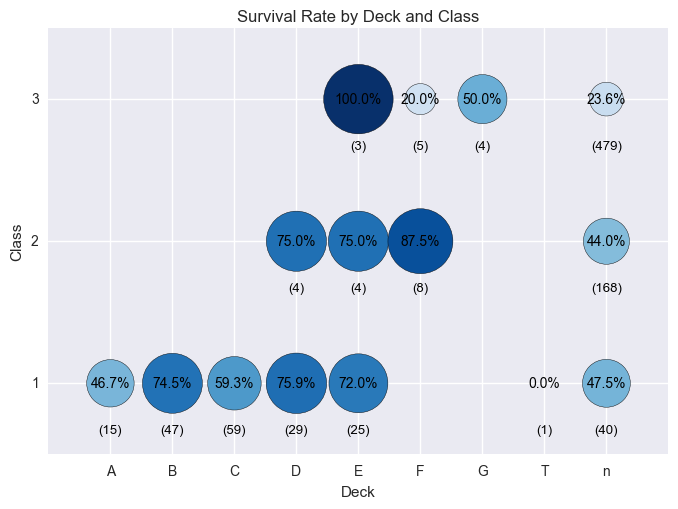

In [126]:
plt.show()

As expected, the number of passengers per group is rather small and shouldn't allow for statistical inferences. Nevertheless, we can spot some interesting facts about those passengers:
- Despite a survival percentage of 24% for 3rd class passengers, all of those passengers in deck E from 3rd class survived. This points in the direction of deck E having offered good conditions for survival for its passengers, as included in H3.

- A much higer percentage of passengers from 1st class has had their cabins identified, when compared to those from 3rd class. Perhaps there was a systematic difference in the efforts to identify locations of passengers from different classes.

- There was a big difference in the percentage of surviving passengers on deck F between those in the second and third class. This indicates that the probability of survival changed with an interaction between class an deck.

We now move on to discussing the limitations of our exploratory analyses.

# Part 2: Limitations

The present analysis is limited in several different ways. First, the findings are exploratory and it would be necessary to perform statistical tests to infer their significance. We therefore cannot state that there was indeed a difference in survival likelihood when it was assumed, as it could have been due to chance.

Also, there were missing values in the dataset, the rows of which have been omitted from the respective analyses. This means the passengers analyzed were actually different between the analyses. Not only was the number of passengers included reduced, but also the selection of only the ones that didn't have the value missing may represent a sampling bias that influences the results.

Variables that were not included in the dataset could have helped in the analyses. For instance, the passenger's location at the time of impact with the iceberg may have had an influence in their likelihood to survive.

Finally, it can't be assumed that a correlation between variables means causation between them. Embarking at the Cherbourg port, for instance, didn't necessarily give passengers a higher chance of survival. As mentioned in the analysis, the correlation could actually be explained by the fact that a high proportion of passengers who embarked at that port stayed on 1st class.

